### Data Bootcamp: Intro to Matplotlib (Line Plots and Scatter Plots)
This is my notebook as an intro to Matplotlib (and juypter notebooks). Be sure to read the chapter [**Python Graphics.**](https://nyudatabootcamp.gitbooks.io/data-bootcamp/content/graphs1.html) I'm going to organize this lecture around the question **How does GDP and it's expenditure componenets co-move?** There are several steps to answering this question:
- We will use `pandasdatareader` and bring in GDP data
- Then we will primarily work with the matplotlib approach of a figure and an axes approach.
- Work through different functionality as we do so. To limit the scope for now, lets ask a smaller question **How does Consumption and GDP co-move over time?** 

In [1]:
import pandas as pd    #Our pandas package
from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt # This will get us the datatime package
import matplotlib.pyplot as plt

#%matplotlib inline 
# This line tells jupyter to plot the graphs within the notebook

- The first line is our pandas package
- The second line is the data reader that will give us access to fred
- The third line is the datatime package
- The fourth line is new this is brining in the Matplotlip pyplot module
- The fith line then tells jupyter to plot stuff within everything.

In [2]:
start = dt.datetime(2000,1,1) 
codes = ["GDPC1", "PCECC96", "GPDIC1", "GCEC1","EXPGSC1","IMPGSC1"] 

- This gives us our start date
- This will give us (quarterly) real gdp, consumption, investment, government expenditures, then net-exports. All in real terms. In other words, we have the Y = C + I + G + NX identitiy. 
- Here is a [nice intro to FRED doing this kind of thing](https://www.stlouisfed.org/~/media/Education/Lessons/pdf/FRED-GDP-Stacking.pdf)

In [3]:
usdata = data.DataReader(codes, "fred", start)
usdata.columns = ["gdp", "cons","invs", "gov", "exp", "imp"]
usdata["cons_share"] = usdata.cons / usdata.gdp
usdata["nx"] = usdata.exp - usdata.imp
usdata["stat_des"] = (usdata.gdp - usdata.cons - usdata.invs - usdata.gov - usdata.nx)/usdata.gdp
usdata.head()

,gdp,cons,invs,gov,exp,imp,cons_share,nx,stat_des
DATE,,,,,,,,,
2000-01-01,12359.1,8054.9,2287.8,2476.2,1219.2,1668.1,0.651738,-448.9,-0.000882
2000-04-01,12592.5,8132.2,2424.5,2506.4,1254.7,1719.6,0.645797,-464.9,-0.000453
2000-07-01,12607.7,8211.3,2394.1,2501.2,1285.5,1779.0,0.651292,-493.5,-0.000428
2000-10-01,12679.3,8284.4,2395.6,2509.0,1274.3,1778.1,0.653380,-503.8,-0.000465
2001-01-01,12643.3,8319.4,2285.3,2546.3,1254.5,1748.5,0.658009,-494.0,-0.001084


I want to express and plot stuff as growth rates, so I'm going to create a new column with the data sereis in percent changes...note below, the percent change is doing quarter to quarter, to annualize the growth rate, multiply it by four...then times it by 100.

I changed this a bit as we want to scale things up a bit. To to automate things...note waht I did: (i) I created a variable list of the things I care about (ii) when through a for loop and created a `new_name` which is simply the varible name with `_growth` added to it then (iii) then compute the annulized percent change and assined it to a new column with the new name.

In [4]:
var_list = ["gdp", "cons","invs", "gov", "nx"]

for var in var_list:
    new_name = var + "_growth"
    usdata[new_name] = 100*4*usdata[var].pct_change()
    
usdata.head()

,gdp,cons,invs,gov,exp,imp,cons_share,nx,stat_des,gdp_growth,cons_growth,invs_growth,gov_growth,nx_growth
DATE,,,,,,,,,,,,,,
2000-01-01,12359.1,8054.9,2287.8,2476.2,1219.2,1668.1,0.651738,-448.9,-0.000882,NaN,NaN,NaN,NaN,NaN
2000-04-01,12592.5,8132.2,2424.5,2506.4,1254.7,1719.6,0.645797,-464.9,-0.000453,7.553948,3.838657,23.900691,4.878443,14.257073
2000-07-01,12607.7,8211.3,2394.1,2501.2,1285.5,1779.0,0.651292,-493.5,-0.000428,0.482827,3.890706,-5.015467,-0.829876,24.607442
2000-10-01,12679.3,8284.4,2395.6,2509.0,1274.3,1778.1,0.653380,-503.8,-0.000465,2.271628,3.560947,0.250616,1.247401,8.348531
2001-01-01,12643.3,8319.4,2285.3,2546.3,1254.5,1748.5,0.658009,-494.0,-0.001084,-1.135709,1.689923,-18.417098,5.946592,-7.780865


In [5]:
usdata.gdp_growth.mean() # This should be about two percent...

1.8705563246355723

Note why I'm doning this. I have an idea about what GDP growth is, I want to verify that my computation is consistent with that idea (in this case growth should be about two percent). For example, if the number reteruned was like 123.45, I would quickly know that there is some problem with my code some where **above** this line! 

#### Now Some Plotting

First, the book talks through other approaches to using matplotlib. The approach I will walk through is the third approach and is perfered. The basic idea is that the call above will create two types of objects, a fig object which is like the blank canvas for which a plot call will plot stuff on... The key object however will be the ax or axes part, what this will do is allow us direct axess to the properties of the firgure, title, legange, line colors, etc....

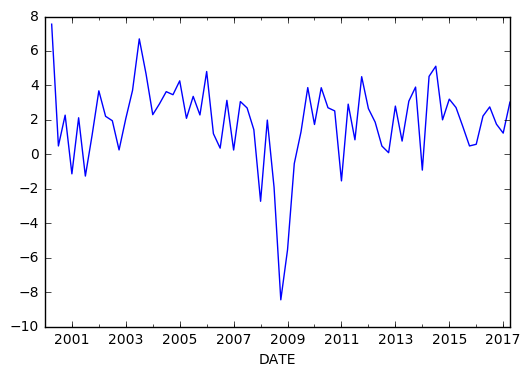

In [6]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax) # So this ploted gdp growth using the axes generated above....
plt.show()

- The first line above is an **important element** of our code plotting style| we first generate a fig (our canvas) and the axes (all the stuff the adorns the canvas, almost like a frame around the canvas). 

- The second line then plots what we want and **pass to it** our axes. What this will alow us to do is when ever we modivy our axes, then the associated figure will change as we specify it. 

- The output from this process is just a simple graph. Some numbers on the y-axis, data on the x-axis (and the only reason it does this is that the dataframe and ploting library recognizes that the index is a date)... It looks ok, but it does not really communicate anything. So now we want to make it look pretty/more professional.


##### Making it look pretty...
A copule of basic elements that we **ALWAYS NEED**: (i) a title (ii) well labeled x and y axis. Note that the well labeld should mean a couple of things, what it is and what units they are in. Now the code below does this using the methods associated with our axes object `ax.` 

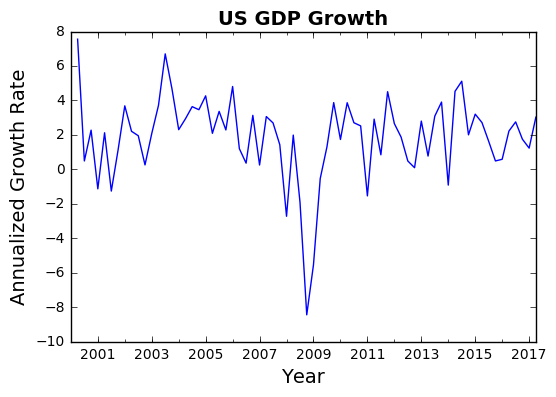

In [7]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax) # So this ploted gdp growth using the axes generated above....

ax.set_title("US GDP Growth", fontsize = 14, fontweight = "bold") # Sets the title. Make it BIG so people understand 
                                                                  # what it is about...
ax.set_ylabel("Annualized Growth Rate", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)

plt.show()

Now this is looking much better. Let me show you a couple of more things.... 
- First, we may want to make the line thicker...again if you are giving a presentation be minduful that when the power point goes up, the lighting may be such that it will be hard to see. 
- Second, having the y-axis be symetric is always nice; so I'm going to reset the y-limits. 
- Third, sometimes you need a legend (in this case not really since the title says it all, but here is a command to do so).

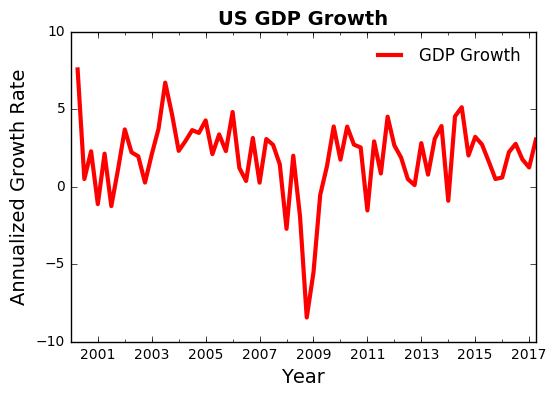

In [8]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax, color = 'r', linewidth = 3.0) 

# HERE I'm changing the color and the thickness of the line...

ax.set_title("US GDP Growth", fontsize = 14, fontweight = "bold") 
ax.set_ylabel("Annualized Growth Rate", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)

ax.set_ylim(-10,10) # This sets the y-limits

ax.legend(["GDP Growth"],frameon=False) 
# Then this sets the legend...note I used the frameon = False option that removes the box around the the legend...

plt.show()

A couple of more options I will show you. 
- One is I'm going to change the x-limit or the data so that we see stuff only from 2005 onward. 
- Second, I'm going to remove the box part of the graph... I think it looks nicer for time series plots...

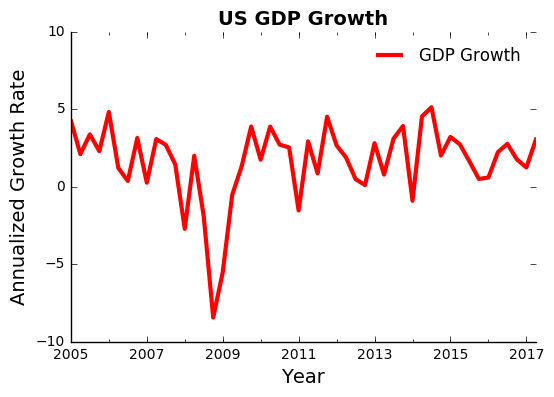

In [9]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax, color = 'r', linewidth = 3.0) 

# HERE I'm changing the color and the thickness of the line...

ax.set_title("US GDP Growth", fontsize = 14, fontweight = "bold") # Sets the title
ax.set_ylabel("Annualized Growth Rate", fontsize = 14,) # The ylable
ax.set_xlabel("Year", fontsize = 14,) # the xlable

ax.set_ylim(-10,10) # This sets the y-limits

ax.legend(["GDP Growth"],frameon=False) # The legend, without a box...

##################################################################################
# This is the new stuff...

ax.set_xlim(dt.datetime(2005,1,1)) # Set the time frame, note that the index is a 
                                   # date time, so to specify where to start 
                                   # I just used the dateime functionality....

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

Now that is cool! We now have a **very** clean, nice, and informative graph. Big picture...the key thing about this process is it (i) gives us a lot of direct control and (ii) we won't have todo this over and over again (e.g. if you were trying to make multiple plots in excel. 

#### GDP AND Consumption

Now lets make two side by side plots of GDP growth and consumption growth so that we can compare them. The process is simmilar, but we can also use for loops to simplify some of the process...

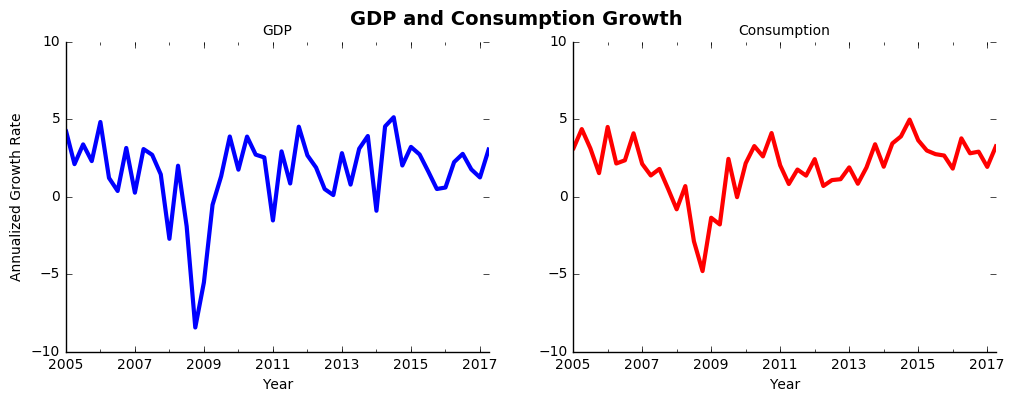

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify that the first axes is for GDP
usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(-10,10)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
    var.set_xlim(dt.datetime(2005,1,1)) # set the x limit to 2005, Jan, 1

    
ax[0].set_ylabel("Annualized Growth Rate") # Lable the y axis (only once since its the same for both)


plt.show()

**BOOM!** That was awesome, two nice looking graphs illustrating how GDP growth and Consumption growth have fluctuated over the past 12 years...

---

### Lets practice

- Can you create a new code cell and do the followng...

- Can you do the same type of plot but GDP and Net-Exports? What do you see?

- Challangeing: Can you plot a horizontal line indicating the average growth rate of this time period?

---


### Scatter Plots....

Lets return to the substantive question... How does Consumption and GDP co-move over time? While the 2008/2009 recession suggest that when GDP is low, then consumption is low...thus, they co-move (or correlate highly over time). However, its not that obvious, note that there seem to be far more fluctuations in GDP than Consumption. How can we get a better look at the correlation of these two data series. One was is a scatter plot. So lets look at how to build one of those.

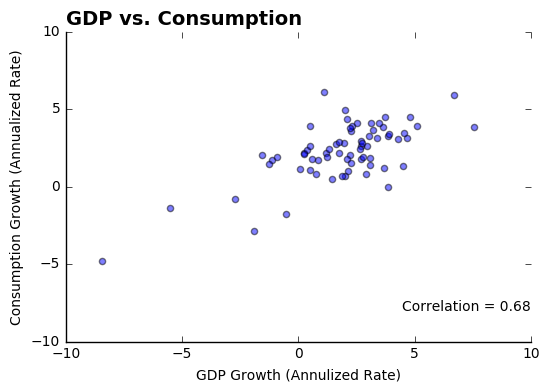

In [11]:
fig, ax = plt.subplots() # Same deal here...

ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     # x,y variables 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

##################################################################################
# Again, lets make this informative...

ax.set_title('GDP vs. Consumption ', loc='left', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

ax.set_ylim(-10,10) # Make this a box...why, one can then by eye infer the slope...
ax.set_xlim(-10,10) # 

##################################################################################
# Now I'm going to make this very fancy, by putting in a message...


corr_mat = usdata.corr() # This is the correlation matrix of the data series in the df
cr = corr_mat.gdp_growth.cons_growth

message = "Correlation = " + str(round(cr,2)) 
# This is creating a string the will report the correlation between 
# the two data series...

ax.text(10, -8, message, horizontalalignment='right')
# This command then creates a text box. The first two numbers tell the location
# So at about 10 percent, then -8 percent, then the message, then how to align 
# things, this says right: so the right edge will line up with 10 percent.

plt.show()

That is **AWESOME**. You tell your boss, you stayed up all night to make this look so nice... this took seconds todo...you get promoted AND saved time! 

Quick note, this plot does make clear my hesitation above. They are very related, but not one for one...

### Scaling it up!

This is the point of python: if we were just to do one graph, **maybe**, it still might be quicker in excel... but if we have to do a lot of graphs, this is when the automation of python really kicks in. I want to make the same exact kind of scatter plot, but with Consumption, Investment, Government, and Net-Exports.

Lets... do this! Side note, this actually took me a little bit of time to completely work through, 

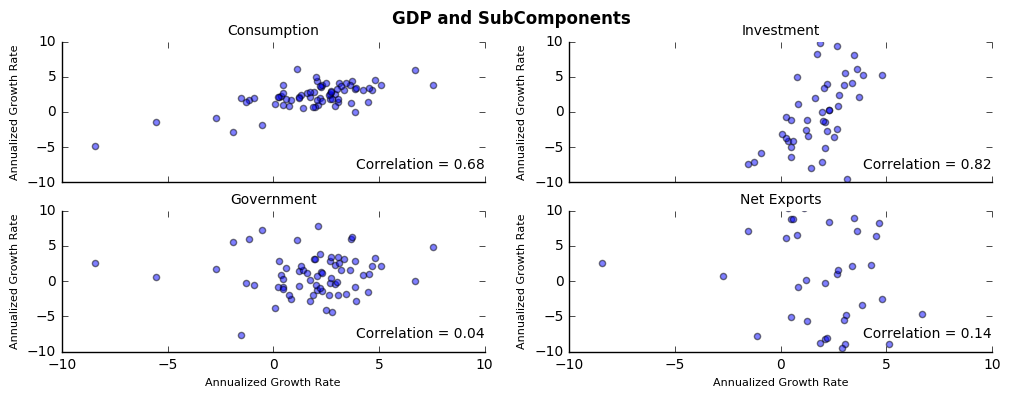

In [66]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (12,4)) 

ax = ax.ravel() # Here is the trick here, ax is a 2 by 2 array. We want to work through it in a loop...so
                # one way to do this is to flatten stuff out, make it a 4 by 1 array. The ravel command 
                # does this...

var_list = ["cons","invs", "gov", "nx"]
nice_name = ["Consumption", "Investment", "Government", "Net Exports"]
new_name = []

# Create some lists... the var_list and new name will allow me to pull the series
# the nice name allows me to report a nice name for the plot...

corr_mat = usdata.corr() # This is the correlation matrix of the data series in the df

for var in var_list:
    new_name.append(var + "_growth") # So this is going through and creating the name structure
                                     # to get the growth rate number...

# Now I'm going to work through each axes, plot the correct data, then set it up to look nice
# the one thing I need is a counter so as I walk through the axes I can get the correct 
# data series that I need....

count = 0

for xxx in ax:
    
    xxx.scatter(usdata["gdp_growth"], usdata[new_name[count]], alpha= 0.50) # Scatter plot
    
    xxx.set_title(nice_name[count], fontsize = 10) # This stuff sets the title for each of the subplots...
    
    xxx.spines["right"].set_visible(False) # remove the top and right spines
    
    xxx.spines["top"].set_visible(False) # Same as above
    
    
    xxx.set_ylabel("Annualized Growth Rate", fontsize = 8) # set the x label to year
    
    if count > 1: # I only one the x label for the bottom ones...
        xxx.set_xlabel("Annualized GDP Growth Rate", fontsize = 8) # set the x label to year
    
    xxx.set_xlim(-10,10) # 
    xxx.set_ylim(-10,10) # This is throwing out a lot of stuff... this is the one issue...
    
    cr = corr_mat.gdp_growth[new_name[count]] # get the correlation matrix
    
    message = "Correlation = " + str(round(cr,2)) # put the stuff together

    xxx.text(10, -8, message, horizontalalignment='right') # print the message in the text box on the figure
      
    count = count + 1 # update counter
    
fig.suptitle("GDP and SubComponents", fontsize = 12, fontweight = "bold") # big titel


plt.show()

Ok, that was impressive, wow! We used a ton of our skills, a little google fu (the `ravel` command was key), and then generated a nice plot reporting the relationship between GDP and its subcomponents.

**What did we learn?** Consumption and investment are highly correlated with GDP. By noting the slope of the relationship, consumption is less volitile, investment is more volitile. Government spending and net exports appear to have very little, systematic relationship with GDP growth.